# K-Means clustering on Image Database

Importing Important Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

Accessing image database from Google Drive

In [16]:
path = "/content/drive/MyDrive/ME793/micrographs"
files = [f for f in os.listdir(path)]

Resizing of images for ease of computation using Python Image Library and creating data array for compressed images

In [17]:
from PIL import Image

data = np.zeros((len(files), 62500)) 
for i, file in enumerate(files):
    # Resizing the images to (250,250)
    image = Image.open(os.path.join(path, file)).resize((250,250)) 
    image_array = np.array(image).flatten()
    data[i] = image_array
data.shape

(971, 62500)

## PCA Analysis

In [18]:
Clus_dataSet = StandardScaler().fit_transform(data)

In [19]:
variance = 0.98 
pca = PCA(variance)

Fiting data into our PCA instance

In [20]:
pca.fit(Clus_dataSet)

PCA(n_components=0.98)

Finding reduced dimensions

In [21]:
print("Number of components before PCA  = " + str(data.shape[1]))
print("Number of components after PCA 0.98 = " + str(pca.n_components_))

Number of components before PCA  = 62500
Number of components after PCA 0.98 = 804


Transforming our data according to PCA instance

In [22]:
Clus_dataSet = pca.transform(Clus_dataSet)

In [23]:
print("Dimension of our data after PCA  = " + str(Clus_dataSet.shape)) 

Dimension of our data after PCA  = (971, 804)


Creating K means clustering model for k values ranging from 1 to 12

In [24]:
SSE2 = []
mapping1 = {}
K1 = range(1, 20)
for k1 in K1:
    # Building and fitting the model
    kmeanModel1 = KMeans(n_clusters=k1)
    kmeanModel1.fit(Clus_dataSet)
    SSE2.append(kmeanModel1.inertia_)
    mapping1[k1] = kmeanModel1.inertia_

Printing k values as a dictionary

In [25]:
print('Sum of squared distance for corresponding k values :')
for key, val in mapping1.items():
    print(f'{key} : {val}')

Sum of squared distance for corresponding k values :
1 : 57799890.01406452
2 : 49323062.18494442
3 : 46985582.24009617
4 : 45621909.692433104
5 : 45099736.11782737
6 : 45055824.10297862
7 : 44561871.63965863
8 : 44558292.282586485
9 : 44360862.095910266
10 : 43961729.85941517
11 : 44110445.35788962
12 : 43850906.02324322
13 : 43729228.61706281
14 : 43576697.038637295
15 : 43367779.39447287
16 : 43109907.767413676
17 : 43171389.75624439
18 : 42991914.38417765
19 : 42986216.59038122


# Elbow Plot for Image Database

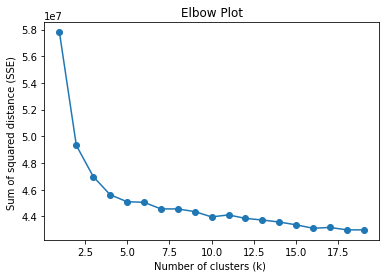

In [26]:
plt.plot(K1, SSE2, '-o')
plt.xlabel('Number of clusters (k) ')
plt.ylabel('Sum of squared distance (SSE) ')
plt.title('Elbow Plot')
plt.show()

From elbow plot we realized that k=4 is optimum for classification and so we develop k means clustering model for k=4 and plot our clusters

In [27]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(Clus_dataSet)
pred = kmeans.predict(Clus_dataSet)

# Classification of Images based on clusters plot for Image Database

cluster 1
256 Images


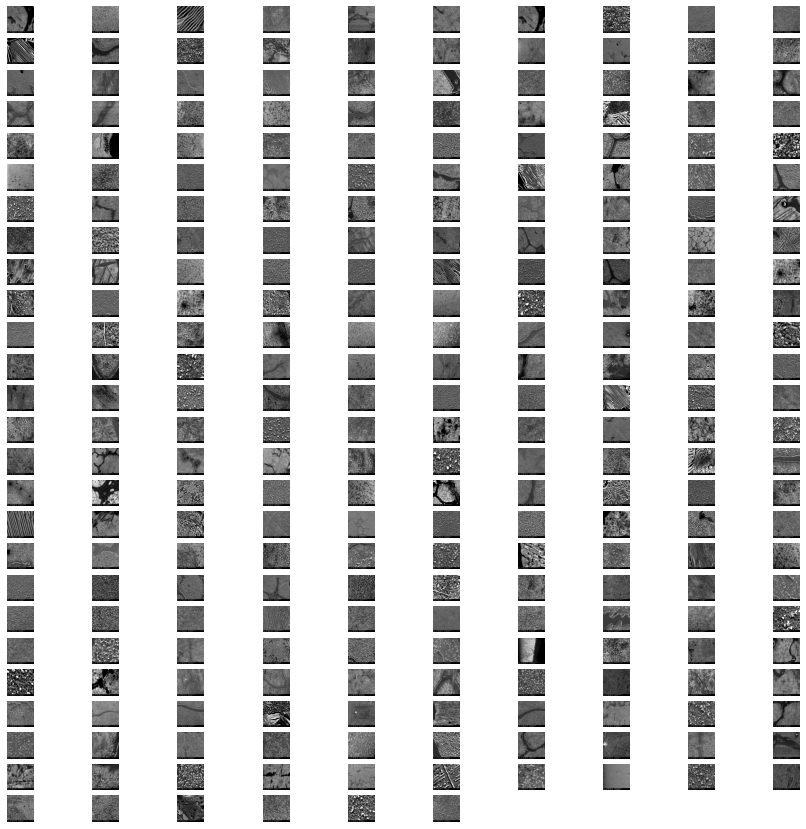

cluster 2
51 Images


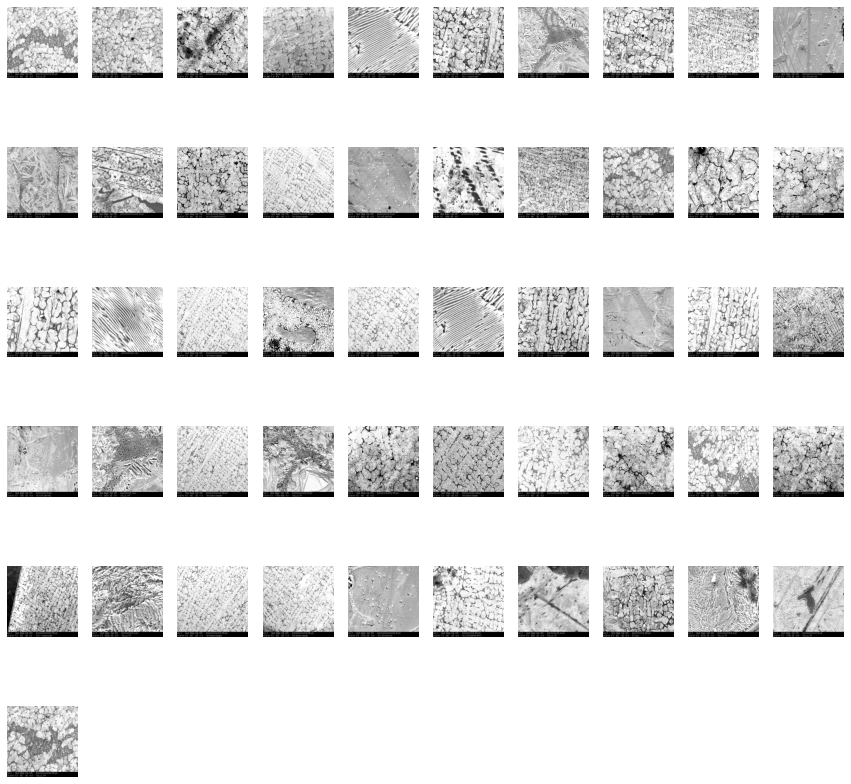

cluster 3
378 Images


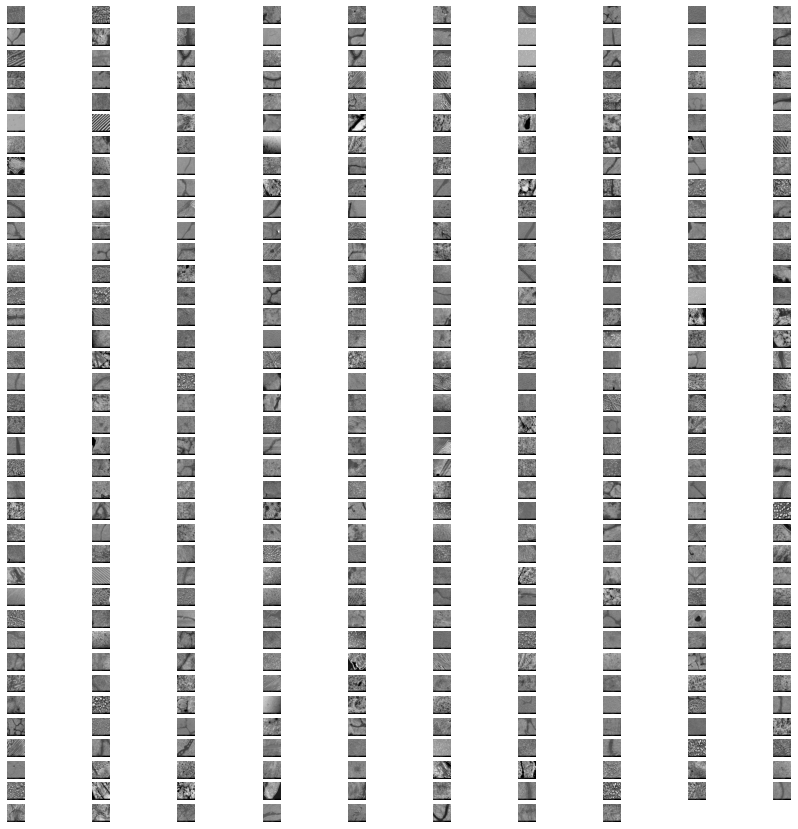

cluster 4
286 Images


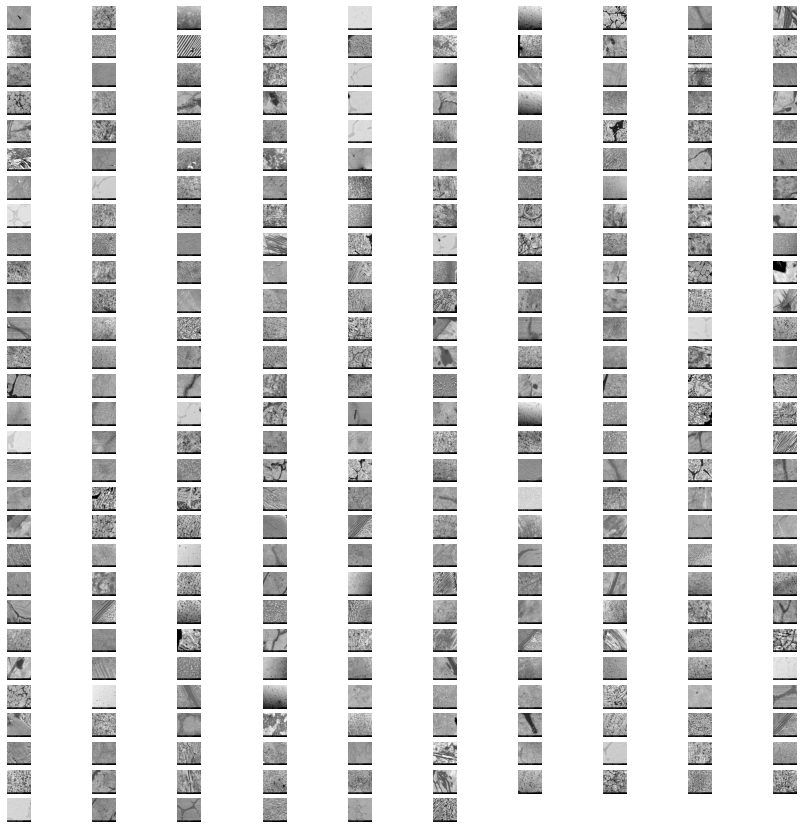

In [29]:
for i in range(0,4):
    row = np.where(pred==i)[0]  # row in data for elements of cluster i
    num = row.shape[0]       #  number of elements for each cluster
    r = np.floor(num/10.)    # number of rows in the figure of the cluster 
    print("cluster "+str(i+1))
    print(str(num)+" Images")
    plt.figure(figsize=(15,15))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = data[row[k]]
        image = image.reshape(250, 250)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()